# 1. 이해하기

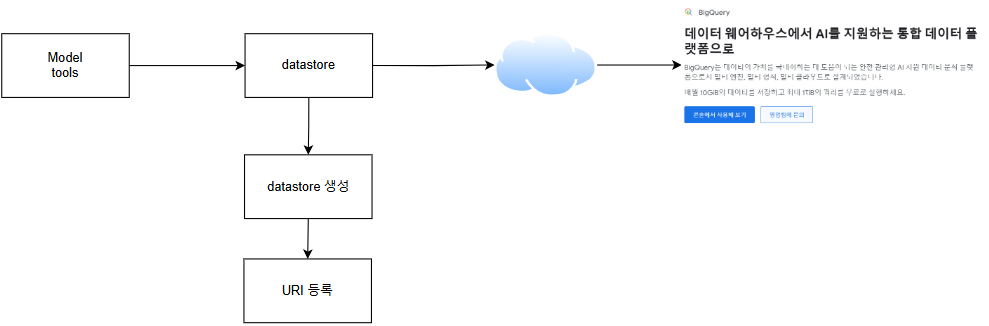

# 2. 코드 이해하기

## 2.1 라이브러리 설치

In [3]:
!pip install --upgrade google-cloud-discoveryengine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.3 MB/s eta 0:00:00


In [4]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## 2.2 초기화

In [1]:
PROJECT_ID = !gcloud config get-value core/project
PROJECT_ID = PROJECT_ID[0]
LOCATION="global"
DATASTORE_ID="web-datastore"

In [2]:
from google.cloud import discoveryengine_v1 as discoveryengine

## 2.3 함수 생성

In [3]:
def CreateDataStore(project_id, location, datastore_id):
  client = discoveryengine.DataStoreServiceClient()

  parent = client.collection_path(project_id, location, collection="default_collection")

  data_store=discoveryengine.DataStore(
      display_name=datastore_id,
      industry_vertical=discoveryengine.IndustryVertical.GENERIC,
      solution_types=[discoveryengine.SolutionType.SOLUTION_TYPE_SEARCH],
      content_config=discoveryengine.DataStore.ContentConfig.PUBLIC_WEBSITE
  )

  request = discoveryengine.CreateDataStoreRequest(
    parent=parent, data_store=data_store, data_store_id=datastore_id
  )

  return client.create_data_store(request=request)

def setURI(project_id, location, datastore_id, uri):
  client = discoveryengine.SiteSearchEngineServiceClient()

  parent = client.site_search_engine_path(project_id, location, datastore_id)
  target_site = discoveryengine.TargetSite(
      provided_uri_pattern=uri,
      type_ = discoveryengine.TargetSite.Type.INCLUDE,
      exact_match=False
  )

  return client.create_target_site(parent=parent, target_site=target_site,)

## 2.3 Data store 생성

In [4]:
operation = CreateDataStore(PROJECT_ID, LOCATION, DATASTORE_ID)
operation.result()

name: "projects/429718924597/locations/global/collections/default_collection/dataStores/web-datastore"
display_name: "web-datastore"
industry_vertical: GENERIC
solution_types: SOLUTION_TYPE_SEARCH
default_schema_id: "default_schema"
content_config: PUBLIC_WEBSITE

## 2.4 URI 등록

In [24]:
operation = setURI(PROJECT_ID, LOCATION, DATASTORE_ID, "cloud.google.com/bigquery")
operation.result()

name: "projects/429718924597/locations/global/collections/default_collection/dataStores/web-datastore/siteSearchEngine/targetSites/00062b3b3a20a2fdY2xvdWQuZ29vZ2xlLmNvbS9iaWdxdWVyeSo"
provided_uri_pattern: "cloud.google.com/bigquery"
type_: INCLUDE
generated_uri_pattern: "cloud.google.com/bigquery*"
root_domain_uri: "google.com"
update_time {
  seconds: 1736383238
  nanos: 546000000
}

# 3. Vertex AI Search를 사용한 비공개 데이터에 대한 기본 응답

## 3.1 모델 생성

In [6]:
import vertexai

In [12]:
from vertexai.preview.generative_models import(
    GenerativeModel,
    GenerationConfig,
    Tool,
    grounding
)

In [17]:
def getModel(project_id, init_location, grounding_location, datastore_id):
  vertexai.init(project=project_id, location=init_location)

  tool = Tool.from_retrieval(
      grounding.Retrieval(
          grounding.VertexAISearch(
              datastore=datastore_id,
              project=project_id,
              location=grounding_location
          )
      )
  )

  return GenerativeModel(
      "gemini-1.5-flash",
      generation_config=GenerationConfig(temperature=0.0),
      tools=[tool])

## 3.2 결과 확인

In [18]:
init_location="us-east1"
model = getModel(PROJECT_ID, init_location, LOCATION, DATASTORE_ID)

In [28]:
prompt="""
  bigquery에 대해 설명해 줘.
  datastore에서만 검색해줘.
  관련 URL도 함께 공유해줘
"""

response = model.generate_content(prompt)
print(response.text)

## BigQuery: 데이터 분석을 위한 Google Cloud의 강력한 도구

BigQuery는 Google Cloud Platform에서 제공하는 완전 관리형 데이터 웨어하우스 서비스입니다. 대규모 데이터 세트를 빠르고 효율적으로 분석하고 쿼리할 수 있는 강력한 도구입니다. 

**BigQuery의 주요 특징:**

* **서버리스:** 별도의 서버 관리 없이 데이터 분석에 집중할 수 있습니다.
* **확장성:** 데이터 규모에 따라 자동으로 확장되어 대규모 데이터 세트도 처리 가능합니다.
* **빠른 쿼리:** Google의 강력한 인프라를 활용하여 빠른 쿼리 실행 속도를 제공합니다.
* **SQL 지원:** 표준 SQL을 사용하여 데이터를 쿼리하고 분석할 수 있습니다.
* **데이터 시각화:** 데이터 시각화 도구를 통해 분석 결과를 시각적으로 표현할 수 있습니다.
* **기계 학습 통합:** BigQuery ML을 통해 데이터 분석에 기계 학습 모델을 적용할 수 있습니다.
* **데이터 공유:** 데이터를 쉽게 공유하고 협업할 수 있습니다.

**BigQuery 사용 사례:**

* **데이터 분석:** 대규모 데이터 세트를 분석하여 트렌드를 파악하고 통찰력을 얻습니다.
* **보고서 작성:** 데이터 분석 결과를 기반으로 보고서를 작성합니다.
* **데이터 시각화:** 데이터를 시각적으로 표현하여 이해를 돕습니다.
* **기계 학습:** BigQuery ML을 사용하여 데이터 분석에 기계 학습 모델을 적용합니다.
* **데이터 웨어하우스:** 데이터를 저장하고 관리하는 데이터 웨어하우스로 사용합니다.

**관련 URL:**

* **BigQuery 공식 웹사이트:** [https://cloud.google.com/bigquery](https://cloud.google.com/bigquery)
* **BigQuery 문서:** [https://cloud.google.com/bigquery/docs](https://cloud.google.com/big

In [30]:
prompt="""
  gemini에 대해 설명해 줘.
  datastore에서만 검색해줘.
  관련 URL도 함께 공유해줘
"""

response = model.generate_content(prompt)
print(response.text)

죄송합니다. 저는 데이터 저장소에 액세스할 수 없으므로 "gemini"에 대한 정보를 제공하거나 관련 URL을 공유할 수 없습니다. 

"gemini"에 대한 정보를 찾으려면 Google과 같은 검색 엔진을 사용하거나 Wikipedia와 같은 신뢰할 수 있는 웹사이트를 방문하는 것이 좋습니다. 

더 구체적인 질문이 있으면 알려주세요. 최선을 다해 도와드리겠습니다. 



In [31]:
prompt="""
  gemini에 대해 설명해 줘.
  관련 URL도 함께 공유해줘
"""

response = model.generate_content(prompt)
print(response.text)

## Gemini: 구글의 새로운 대규모 언어 모델

Gemini는 구글에서 개발한 새로운 대규모 언어 모델(LLM)입니다. 2023년 12월에 발표되었으며, 구글은 Gemini를 "가장 강력하고 다재다능한" LLM이라고 주장합니다. 

**Gemini의 주요 특징:**

* **다중 모달:** 텍스트, 이미지, 오디오, 비디오 등 다양한 형태의 데이터를 이해하고 처리할 수 있습니다.
* **강력한 추론 능력:** 복잡한 문제를 해결하고 논리적인 추론을 수행할 수 있습니다.
* **다양한 작업 수행:** 텍스트 생성, 번역, 요약, 코드 생성, 질문 답변 등 다양한 작업을 수행할 수 있습니다.
* **높은 정확성:** 기존 LLM보다 더 높은 정확성을 제공합니다.

**Gemini의 종류:**

* **Gemini Pro:** 다양한 작업을 수행할 수 있는 기본 모델입니다.
* **Gemini Ultra:** 가장 강력한 모델로, 복잡한 문제 해결과 창의적인 작업에 특화되어 있습니다.
* **Gemini Nano:** 모바일 기기에서 사용할 수 있는 경량 모델입니다.

**Gemini의 활용:**

* **검색:** 더 정확하고 관련성 높은 검색 결과를 제공합니다.
* **생성 AI:** 텍스트, 이미지, 비디오 등 다양한 콘텐츠를 생성합니다.
* **개인 비서:** 개인 일정 관리, 정보 검색, 작업 자동화 등을 지원합니다.
* **교육:** 학습 자료 생성, 개인 맞춤형 학습 경험 제공 등을 지원합니다.

**관련 URL:**

* **구글 Gemini 공식 웹사이트:** [https://gemini.google.com/](https://gemini.google.com/)
* **구글 AI 블로그:** [https://ai.googleblog.com/](https://ai.googleblog.com/)

**참고:**

* Gemini는 아직 개발 중이며, 모든 기능이 공개된 것은 아닙니다.
* Gemini는 구글의 다른 AI 서비스와 통합되어 더욱 강력한

# 4. reference

* https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/grounding?hl=ko
* https://cloud.google.com/generative-ai-app-builder/docs/create-data-store-es?hl=ko#genappbuilder_create_website_data_store-python
* https://cloud.google.com/vertex-ai/generative-ai/docs/ground-responses-using-rag?hl=ko
* https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/ground-gemini?hl=ko#generative-ai-gemini-grounding-python_vertex_ai_sdk
